<left>FINM 36702 - Portfolio Credit Risk: Modeling and Estimation</left>
<left>Spring 2023</left>
<br>
<h1><center> Assignment 4 </center></h1>
<center>Due - 18:00 [CST] April 20th, 2023</center>
<br>
<h3>Ki Hyun</h3>
<h3>Student ID: 12125881</h3>

### Imports

In [1]:
%matplotlib inline

In [5]:
import numpy as np
from scipy.stats import norm
from functools import partial
import matplotlib.pyplot as plt

# Question 2.

In [10]:
def cLGD(cPD, a, PD, ELGD, rho):
    EL = PD * ELGD
    return (ELGD**a) * norm.cdf(norm.ppf(cPD) - (norm.ppf(PD) - norm.ppf(EL / (ELGD**a)))/np.sqrt(1 - rho))/cPD

In [11]:
PD = 0.05
ELGD = 0.3
rho = 0.15
a_params = [-1, 0, 1, 2]

In [12]:
cPDs = np.arange(start = 0, stop = 1, step = 0.001)[1:]
cLGDs = []
for a in a_params:
    cLGD_partial = partial(cLGD, a = a, PD = PD, ELGD = ELGD, rho = rho)
    cLGDs.append(np.vectorize(cLGD_partial)(cPDs))

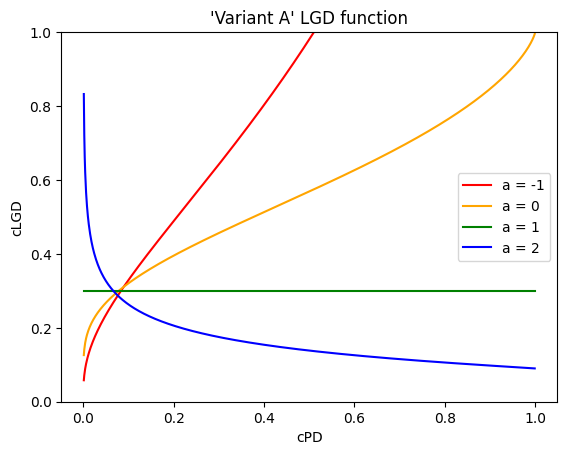

In [15]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for a = -1
ax.plot(cPDs, cLGDs[0], color='red', label='a = -1')

# Plot the data for a = 0
ax.plot(cPDs, cLGDs[1], color='orange', label='a = 0')

# Plot the data for a = 1
ax.plot(cPDs, cLGDs[2], color='green', label='a = 1')

# Plot the data for a = 2
ax.plot(cPDs, cLGDs[3], color='blue', label='a = 2')

# Add labels and title
ax.set_ylabel('cLGD')
ax.set_xlabel('cPD')
ax.set_title("'Variant A' LGD function")
ax.legend()

# Set the limits of the vertical axis to the unit box
ax.set_ylim(0, 1)

# Show the plot
plt.show()
None

# Question 3.

In [16]:
def Vasicek_cdf(x, p, rho):
    return norm.cdf((np.sqrt(1 - rho) * norm.ppf(x) - norm.ppf(p))/np.sqrt(rho))

In [17]:
def Vasicek_inv_cdf(q, p, rho):
    return norm.cdf((norm.ppf(p) + np.sqrt(rho) * norm.ppf(q)) / np.sqrt(1 - rho))

In [18]:
PD = 0.02
rho_cPD = 0.1
EL = 0.01
rhos = [0.05, 0.1, 0.15]

In [25]:
cPD_func = partial(Vasicek_cdf, p = PD, rho = rho_cPD)

In [32]:
cLGDs_2 = []
cPDs_2 = np.arange(start = 0, stop = 0.5, step = 0.001)[1:]
cPDs_q = np.vectorize(cPD_func)(cPDs_2)
for rho in rhos:
    cLGD_func = partial(Vasicek_inv_cdf, p = EL, rho = rho)
    cLosses = np.vectorize(cLGD_func)(cPDs_q)
    cLGDs_2.append(cLosses / cPDs_2)

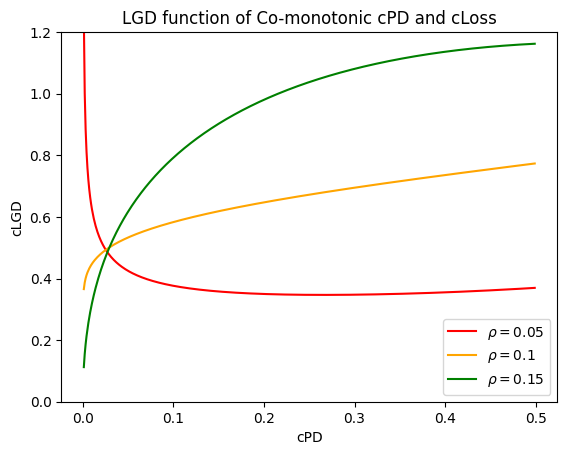

In [33]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data for a = -1
ax.plot(cPDs_2, cLGDs_2[0], color='red', label = r'$\rho = 0.05$')

# Plot the data for a = 0
ax.plot(cPDs_2, cLGDs_2[1], color='orange', label = r'$\rho = 0.1$')

# Plot the data for a = 1
ax.plot(cPDs_2, cLGDs_2[2], color='green', label = r'$\rho = 0.15$')

# Add labels and title
ax.set_ylabel('cLGD')
ax.set_xlabel('cPD')
ax.set_title("LGD function of Co-monotonic cPD and cLoss")
ax.legend()

# Set the limits of the vertical axis to the unit box
ax.set_ylim(0, 1.2)

# Show the plot
plt.show()
None